# Verifica su Python e Numpy
### MENARDI SAMUELE

In [77]:
import numpy as np
import matplotlib.pyplot as plt

## ESERCIZIO 1
Il file *10000Pi.txt* contiene le prime 10000 cifre del $\pi$ in base 10.

Crea un programma in Python 3 (decidi se usare Numpy oppure no) che legga il file e generi un dizionario in cui:
* le chiavi siano le cifre da 0 a 9,
* i valori siano il numero di occorrenze della cifra chiave nelle prime 10000 cifre decimali del $\pi$.

Rispondi alle domande seguenti:
* nelle cifre del $\pi$ capita più spesso uno 0 dopo il 9 oppure un 9 dopo lo 0?
* è presente la seguenza 999999? In caso di risposta affermativa individua in quale punto della sequenza di cifre decimali è presente.

In [78]:
#soluzione qui

In [79]:
with open("10000Pi.txt", "r", encoding = "utf-8") as file:
    testo = file.read()
lista_caratteri_testo = [int(carattere) for carattere in testo[2 : -2]]

In [80]:
dizionario_caratteri_ricorrenze = {} #{numero : occorrenza}
for carattere in lista_caratteri_testo:
    if carattere not in dizionario_caratteri_ricorrenze:
        dizionario_caratteri_ricorrenze[carattere] = 1
    else:
        dizionario_caratteri_ricorrenze[carattere] += 1

In [81]:
array_caratteri_testo = np.array(lista_caratteri_testo)
array_caratteri_testo_sx = np.roll(array_caratteri_testo, -1)

In [82]:
cifre_0_9 = np.count_nonzero((array_caratteri_testo == 0) & (array_caratteri_testo_sx == 9))
cifre_0_9

115

In [83]:
cifre_9_0 = np.count_nonzero((array_caratteri_testo == 9) & (array_caratteri_testo_sx == 0))
cifre_9_0

112

In [100]:
s = "9,9,9,9,9,9"
seq = s.split(",")
seq_int = [int(carattere) for carattere in seq]
sequenza = np.array(seq_int)

In [101]:
array_caratteri_testo_nx_dx = {n : np.roll(array_caratteri_testo, -n) for n in range(1, len(sequenza) + 1)}

In [102]:
is_sequenza = array_caratteri_testo_nx_dx[1] == sequenza[0]
for i in range(1, len(sequenza)):
    is_sequenza = is_sequenza & (array_caratteri_testo_nx_dx[i + 1] == sequenza[i])

In [103]:
indexes = np.arange(0, len(array_caratteri_testo))

In [104]:
indexes[is_sequenza]

array([760])

## ESERCIZIO 2
Dato un numero intero n crea un array numpy unidimensionale fatto in questo modo:

    [-n, -n+1, -n+2, ...,-1, 0, 1, ..., n-2, n-1, n]
    
Per esempio se n=3 l'array è:

    [-3, -2, -1, 0, 1, 2, 3]
    
**NON PUOI USARE CICLI, IF E LISTE**

In [60]:
#soluzione qui

In [61]:
n = 5

In [106]:
array = np.arange(-n , n + 1)
array

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [107]:
array[array != 0]

array([-5, -4, -3, -2, -1,  1,  2,  3,  4,  5])

### ESERCIZIO 3
Simula 100 partite di pari e dispari tra Alice e Bob. Ogni partita è giocata con una mano, quindi i numeri mostrati da Alice e da Bob sono sempre compresi tra 1 e 5. **Simula le partite usando un solo array bidimensionale.**

Alice dichiara sempre pari e Bob sempre dispari.

1) Quante volte vince Alice?

2) Se nelle 100 partite Alice fa uscire sempre 3, quante volte vince?

**NON PUOI USARE CICLI, IF E LISTE**

In [63]:
#soluzione qui
#Alice è la prima riga, Bob la seconda

In [110]:
n_partite = 100

In [111]:
array_partite = np.random.randint(1, 6, (2, n_partite))

In [112]:
array_partite_somma = np.sum(array_partite, axis = 0)
array_partite_somma

array([ 8,  5,  8,  6,  4,  8,  6,  7,  8,  6,  5,  8,  7,  8,  4,  9,  3,
        6,  6,  7,  6,  6, 10,  9,  7,  8,  7,  7,  7,  4,  9,  8, 10,  5,
        4,  3,  7,  7,  6,  2,  8,  7,  6,  4,  8,  8,  5,  5,  9,  5,  3,
        2,  4, 10,  8,  5,  6,  5,  7,  6,  7,  5,  6,  7,  7,  7,  5,  2,
       10,  7,  4,  6,  5,  6,  5,  6,  7,  5,  4,  3,  5,  6,  7,  8,  7,
        4,  5,  5,  5,  6,  8,  4,  6,  6,  8,  5,  6,  8,  5,  8])

In [113]:
vittorie_alice = np.count_nonzero(array_partite_somma % 2 == 0)
print(f"Alice ha vinto {vittorie_alice} volte")

Alice ha vinto 54 volte


In [114]:
array_partite[0] = 3

In [115]:
vittorie_alice = np.count_nonzero(array_partite_somma % 2 == 0)
print(f"Alice ha vinto {vittorie_alice} volte")

Alice ha vinto 54 volte


## ESERCIZIO 4 (BONUS, Facoltativo per DSA)
Usa numpy per creare l'immagine seguente composta da n righe e 2n colonne. L'intensità del colore è casuale nella metà sinistra della matrice, a scacchiera nella metà destra. 

**NON PUOI USARE CICLI, IF E LISTE**

Per esempio con n = 10:

![matrice](matrice.png)

Codice per visualizzare l'immagine:

    plt.imshow(mat)

In [70]:
#soluzione qui
import matplotlib.pyplot as plt

In [71]:
righe = 10
colonne = righe * 2

In [72]:
mat = np.zeros((righe, colonne))

In [73]:
mat[ : : 2, colonne // 2: : 2] = 255
mat[1 : : 2, colonne // 2 + 1 : : 2] = 255

In [74]:
mat[ : , : colonne // 2] = np.random.randint(0, 255, (righe, colonne // 2))

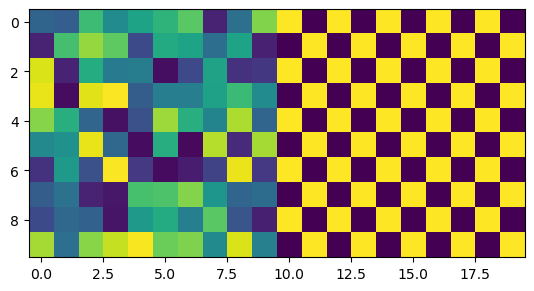

In [75]:
plt.imshow(mat)